## **Case Study 2 – Figuring Out Which Customers May Leave – Churn Analysis.ipynb**

Load and take a look at Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [ ]:
churn_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
churn_df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
print("Rows             :", churn_df.shape[0])
print("Columns          :", churn_df.shape[1])
print("\nFeatures       :", churn_df.columns.tolist())
print("\nMissing Values :", churn_df.isnull().sum().values.sum())
print("\nUnique Values  :", churn_df.nunique())

Rows             : 7043
Columns          : 21

Features       : ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing Values : 0

Unique Values  : customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [ ]:
churn_df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# EDA

In [ ]:
data = churn_df.copy()
data.drop(['customerID',"tenure", "MonthlyCharges" , "TotalCharges" ], axis = 1 , inplace = True)

In [ ]:
summary = pd.concat([pd.crosstab(data[x], data.Churn) for x in data.columns[: -1]], keys = data.columns[:-1])
summary

Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

In [ ]:
summary["churn_percentage"] = summary["Yes"] / (summary["No"] + summary["Yes"])
summary

Churn                                         No   Yes  churn_percentage
gender           Female                     2549   939          0.269209
                 Male                       2625   930          0.261603
SeniorCitizen    0                          4508  1393          0.236062
                 1                           666   476          0.416813
Partner          No                         2441  1200          0.329580
                 Yes                        2733   669          0.196649
Dependents       No                         3390  1543          0.312791
                 Yes                        1784   326          0.154502
PhoneService     No                          512   170          0.249267
                 Yes                        4662  1699          0.267096
MultipleLines    No                         2541   849          0.250442
                 No phone service            512   170          0.249267
                 Yes                        2121   850          0.286099
InternetService  DSL                        1962   459          0.189591
                 Fiber optic                1799  1297          0.418928
                 No                         1413   113          0.074050
OnlineSecurity   No                         2037  1461          0.417667
                 No internet service        1413   113          0.074050
                 Yes                        1724   295          0.146112
OnlineBackup     No                         1855  1233          0.399288
                 No internet service        1413   113          0.074050
                 Yes                        1906   523          0.215315
DeviceProtection No                         1884  1211          0.391276
                 No internet service        1413   113          0.074050
                 Yes                        1877   545          0.225021
TechSupport      No                         2027  1446          0.416355
                 No internet service        1413   113          0.074050
                 Yes                        1734   310          0.151663
StreamingTV      No                         1868   942          0.335231
                 No internet service        1413   113          0.074050
                 Yes                        1893   814          0.300702
StreamingMovies  No                         1847   938          0.336804
                 No internet service        1413   113          0.074050
                 Yes                        1914   818          0.299414
Contract         Month-to-month             2220  1655          0.427097
                 One year                   1307   166          0.112695
                 Two year                   1647    48          0.028319
PaperlessBilling No                         2403   469          0.163301
                 Yes                        2771  1400          0.335651
PaymentMethod    Bank transfer (automatic)  1286   258          0.167098
                 Credit card (automatic)    1290   232          0.152431
                 Electronic check           1294  1071          0.452854
                 Mailed check               1304   308          0.191067

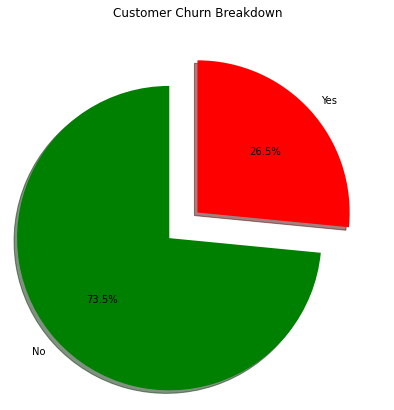

In [ ]:
labels = data['Churn'].value_counts(sort = True).index
sizes = data['Churn'].value_counts(sort = True)
rcParams['figure.figsize'] = 7,7
colors = ["green", "red"]
explode = (0.25 , 0)
plt.pie(sizes , explode = explode ,labels = labels , colors = colors , autopct = "%1.1f%%" , shadow = True , startangle = 90)
plt.title("Customer Churn Breakdown")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


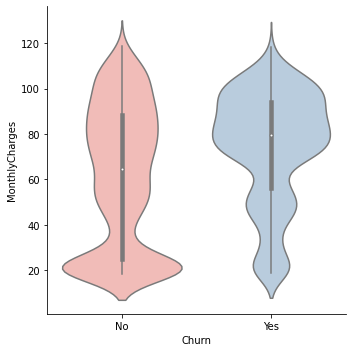

In [ ]:
g = sns.factorplot(x="Churn" , y = "MonthlyCharges", data = churn_df, kind = 'violin', palette = 'Pastel1')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


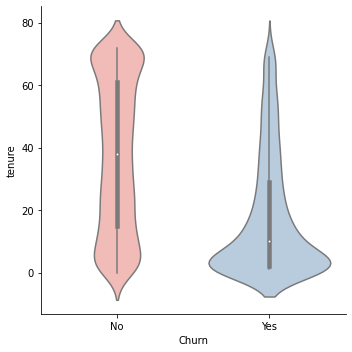

In [ ]:
g = sns.factorplot(x="Churn" , y = "tenure", data = churn_df, kind = 'violin', palette = 'Pastel1')

No handles with labels found to put in legend.


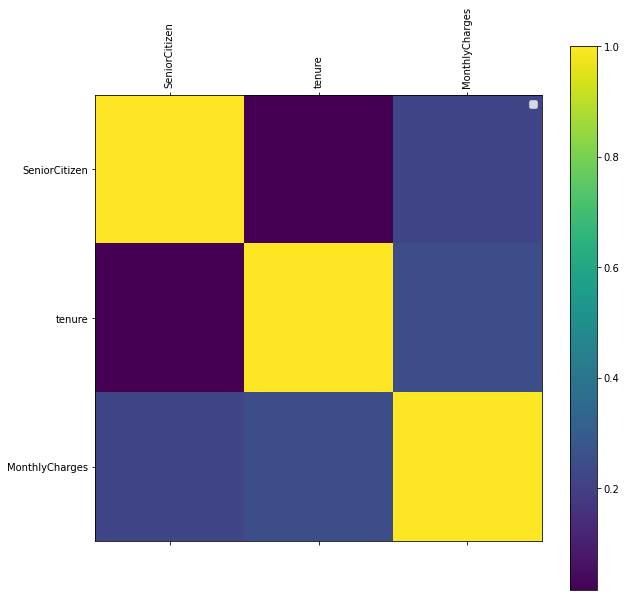

In [ ]:
def plot_corr(df , size = 10):

  corr=df.corr()
  fig,ax = plt.subplots(figsize = (size , size))
  ax.legend()
  cax = ax.matshow(corr)
  fig.colorbar(cax)
  plt.xticks(range(len(corr.columns)) , corr.columns, rotation = 'vertical')
  plt.yticks(range(len(corr.columns)) , corr.columns)

plot_corr(churn_df)

## **Prepare data for model**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
id_col = ["customerID"]
target = ["Churn"]

cat_col = churn_df.columns[churn_df.nunique() < 6][:-1].to_list()
num_col = [x for x in churn_df.columns if x not in target + id_col + cat_col]
bin_col = churn_df.nunique()[churn_df.nunique() == 2].keys().tolist()
multi_col = [x for x in cat_col if x not in bin_col]

In [ ]:
le = LabelEncoder()
for i in bin_col:
  churn_df[i] = le.fit_transform(churn_df[i])

churn_df = pd.get_dummies( data = churn_df , columns = multi_col)

churn_df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
std = StandardScaler()

In [ ]:
churn_df = churn_df.drop(churn_df[churn_df.TotalCharges == " "].index)

In [ ]:
scaled = std.fit_transform(churn_df[num_col])
scaled = pd.DataFrame(scaled , columns = num_col)


In [ ]:
churn_df[num_col] = scaled

In [ ]:
churn_df.isnull().sum()

customerID                                  0
gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                     11
PhoneService                                0
PaperlessBilling                            0
MonthlyCharges                             11
TotalCharges                               11
Churn                                       0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No                             0
OnlineBackup_No internet service  

In [ ]:
churn_df = churn_df.dropna()

## **Modeling**

In [ ]:
from sklearn.model_selection import train_test_split

x = churn_df.drop(['Churn', "customerID"], axis =1).values
y = churn_df['Churn'].values

x_train , x_test , y_train , y_test  = train_test_split(x, y , test_size = 0.2)

## **Fit Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train , y_train)

predictions = model.predict(x_test)
score = model.score(x_test , y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test , predictions))
print(classification_report(y_test , predictions))

Accuracy = 0.8078291814946619
[[910 104]
 [166 225]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1014
           1       0.68      0.58      0.62       391

    accuracy                           0.81      1405
   macro avg       0.76      0.74      0.75      1405
weighted avg       0.80      0.81      0.80      1405



## **Feature Importance using Logistic Regression**

In [ ]:
coef = model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[0.07612526534293423, 0.05699205895271916, 0.2281453534199966, 0.07841997810967545, 0.04307826933081197, 0.1278772165005741, 0.2920169623911769, 0.10490043623499533, 0.12760369749823836, 0.027706432662759413, 0.12717250993699022, 0.10017078383782439, 0.3521679091926971, 0.421386062829471, 0.06992286020030256, 0.2750255224423434, 0.06992286020030256, 0.20580736880555114, 0.1847680115774138, 0.06992286020030256, 0.115549857940689, 0.08784346401038055, 0.06992286020030256, 0.018625310373634386, 0.23740615168769086, 0.06992286020030256, 0.16818799805099402, 0.05871533676942034, 0.06992286020030256, 0.1279334904062454, 0.031163243362958237, 0.06992286020030256, 0.10038139699965282, 1.1846158912139944, 0.033678317649069776, 1.151642280128618, 0.14538457513141287, 0.18242839807521646, 0.3140488823303096, 0.01305938431279683]


In [ ]:
cols = list(churn_df.columns[1:])
cols.index('Churn')

9

In [ ]:
del cols[9]
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mail

In [ ]:
sorted_index = sorted(range(len(coef)) , key = lambda k : coef[k] , reverse = True)

In [ ]:
for i in sorted_index :
  print(cols[i])

Contract_Month-to-month
Contract_Two year
InternetService_Fiber optic
InternetService_DSL
PaymentMethod_Electronic check
PaperlessBilling
OnlineSecurity_No
TechSupport_No
Partner
OnlineSecurity_Yes
OnlineBackup_No
PaymentMethod_Credit card (automatic)
TechSupport_Yes
PaymentMethod_Bank transfer (automatic)
StreamingTV_Yes
PhoneService
TotalCharges
MultipleLines_No phone service
OnlineBackup_Yes
MonthlyCharges
StreamingMovies_Yes
MultipleLines_Yes
DeviceProtection_No
Dependents
gender
InternetService_No
OnlineSecurity_No internet service
OnlineBackup_No internet service
DeviceProtection_No internet service
TechSupport_No internet service
StreamingTV_No internet service
StreamingMovies_No internet service
StreamingTV_No
SeniorCitizen
tenure
Contract_One year
StreamingMovies_No
MultipleLines_No
DeviceProtection_Yes
PaymentMethod_Mailed check


# **Fit Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_r = RandomForestClassifier()
model_r.fit(x_train , y_train)

predictions = model_r.predict(x_test)
score = model_r.score(x_test , y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test , predictions))
print(classification_report(y_test , predictions))

Accuracy = 0.7750889679715303
[[910 104]
 [212 179]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1014
           1       0.63      0.46      0.53       391

    accuracy                           0.78      1405
   macro avg       0.72      0.68      0.69      1405
weighted avg       0.76      0.78      0.76      1405



## **Try Deep Learning**

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x_train.shape

(5616, 40)

In [ ]:
model = Sequential()
model.add(Dense(20 , kernel_initializer = "uniform" , activation = "relu", input_dim =40))
model.add(Dense(1, kernel_initializer = "uniform" , activation = "sigmoid" ))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = "accuracy")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                820       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train , y_train, batch_size=32 , epochs= 100 )

Epoch 1/100
176/176 [==============================] - 3s 6ms/step - loss: 0.5545 - accuracy: 0.7363
Epoch 2/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4498 - accuracy: 0.7774
Epoch 3/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4425 - accuracy: 0.7828
Epoch 4/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4402 - accuracy: 0.7831
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4391 - accuracy: 0.7801
Epoch 6/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4374 - accuracy: 0.7856
Epoch 7/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4370 - accuracy: 0.7822
Epoch 8/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4364 - accuracy: 0.7826
Epoch 9/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4366 - accuracy: 0.7835
Epoch 10/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4360 - accura

In [ ]:
prediction = model.predict(x_test)
prediction = (prediction> 0.5)
print(confusion_matrix(y_test , predictions))
print(classification_report(y_test , predictions))

[[910 104]
 [212 179]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1014
           1       0.63      0.46      0.53       391

    accuracy                           0.78      1405
   macro avg       0.72      0.68      0.69      1405
weighted avg       0.76      0.78      0.76      1405

